## This project focuses on implementing machine learning in credit risk predictions. Detail description will be updated shortly.

# PD model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split

# Import Data

In [169]:
loan_data_backup = pd.read_csv('loan_data.csv')

C:\Users\YizhiZhang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [170]:
loan_data = loan_data_backup.copy()

In [5]:
pd.options.display.max_columns = None

In [171]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# General Processing

## Preprocessing few continuous variables

### Turn 'emp_length' to float

In [174]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [175]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [176]:
loan_data['emp_length_int'].head(10)

0    10
1     0
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     0
Name: emp_length_int, dtype: object

In [177]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [178]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [179]:
loan_data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [180]:
loan_data['emp_length_int'].isnull().sum()

21008

### Turn 'term' into int

In [191]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [192]:
loan_data['term_int'] = loan_data['term'].str.split(expand=True)[0]

In [193]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [194]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

### Turn 'earliest_cr_line' and '' into months since

In [181]:
loan_data['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [182]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [183]:
loan_data['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [184]:
# date = pd.datetime.today()
date = pd.to_datetime('2017-12-01')

In [185]:
date - loan_data['earliest_cr_line_date'].head()

0   12022 days
1    6819 days
2    5874 days
3    7974 days
4    8005 days
Name: earliest_cr_line_date, dtype: timedelta64[ns]

In [186]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((date - loan_data['earliest_cr_line_date']) / np.timedelta64(1,'M')))

In [187]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [188]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [189]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max() 

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

### Turn 'issue_d' and '' into timestamp

In this homework, your task is to preprocess the ‘term’ variable and the ‘issue_d’ variable, similarly to the ‘employment length’ variable and the ‘earliest credit line variable’ we preprocessed in the last lecture. 1. From the variable ‘term’, which is of object (text string) data type, create a new variable, named ‘term_int’, which is numeric and contains the term of the loan in months. Tips: First remove the unnecessary text from each row; then, turn what remains into a numeric variable. 2. From the variable ‘issue date’ (‘issue_d’), which is of object (text string) data type, create a new variable, named ‘mths_since_issue_d’ (‘months since issue date’). Tips: First turn the test strings into dates; then calculate the difference between December 1st 2017 and each of the issue dates, in months; finally, check if the values make sense.

In [195]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

In [196]:
date - pd.to_datetime(loan_data['issue_d'], format='%b-%y')

0        2192 days
1        2192 days
2        2192 days
3        2192 days
4        2192 days
            ...   
466280   1430 days
466281   1430 days
466282   1430 days
466283   1430 days
466284   1430 days
Name: issue_d, Length: 466285, dtype: timedelta64[ns]

In [197]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((date - loan_data['issue_d_date']) / np.timedelta64(1,'M')))

In [198]:
loan_data['mths_since_issue_d'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

In [199]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Dummy discrete variables

In [200]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [201]:
loan_data['grade'].head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [202]:
loan_data_dummies = pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep=':')

In [203]:
loan_data_dummies = [
    pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep=':'),
    pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep=':'),
    pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep=':'),
    pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep=':'),
    pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep=':'),
    pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep=':'),
    pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep=':'),
    pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep=':')
]

In [204]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [205]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [206]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

In [207]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [208]:
pd.options.display.max_rows = 100

In [209]:
loan_data.isnull().sum().values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,  27588,  21008,      0,      4,      0,
            0,      0,      0,      0, 340302,      0,     20,      0,
            0,      0,     29,     29,     29, 250351, 403647,     29,
           29,      0,    340,     29,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,    376,      0,
       227214,     42,    145, 367311,      0,      0, 466285, 466285,
       466285,     29,  70276,  70276, 466285, 466285, 466285, 466285,
       466285, 466285, 466285, 466285, 466285, 466285, 466285,  70276,
       466285, 466285, 466285,  21008,     29,     29,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [210]:
loan_data.isnull().sum() /loan_data.shape[0]

Unnamed: 0               0.0
id                       0.0
member_id                0.0
loan_amnt                0.0
funded_amnt              0.0
                        ... 
addr_state:WI            0.0
addr_state:WV            0.0
addr_state:WY            0.0
initial_list_status:f    0.0
initial_list_status:w    0.0
Length: 207, dtype: float64

In [211]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [212]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In this homework, your task is to fill in the missing values for the remaining variables we are going to use in our models. Here are the instructions about what values to replace the missing values with for the remaining variables. 1. For annual income (‘annual_inc’), replace the missing values with the mean of the non-missing values of the variable. 2. For all of the following variables, replace the missing values with zeroes: ‘mths_since_earliest_cr_line’ ‘acc_now_delinq’ ‘total_acc’ ‘pub_rec’ ‘open_acc’ ‘inq_last_6mths’ ‘delinq_2yrs’ ‘emp_length_int’

In [213]:
loan_data['annual_inc'].isnull().sum()

4

In [214]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [215]:
loan_data['annual_inc'].isnull().sum()

0

In [216]:
loan_data.update(loan_data[['mths_since_earliest_cr_line', 'acc_now_delinq', 'total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']].fillna(0))

In [217]:
loan_data[['mths_since_earliest_cr_line', 'acc_now_delinq', 'total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']].isnull().sum()

mths_since_earliest_cr_line    0
acc_now_delinq                 0
total_acc                      0
pub_rec                        0
open_acc                       0
inq_last_6mths                 0
delinq_2yrs                    0
emp_length_int                 0
dtype: int64

create good/bad definition

In [218]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [219]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [220]:
loan_data['good_bad'] =np.where(loan_data['loan_status'].isin(['Charged Off','Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']),0,1)

In [221]:
loan_data['good_bad'].unique()

array([1, 0])

Independent Variables into dummies according to **WoE**

fine classing -> WoE calculation -> Coarse classing

# $\text{WoE}_{i}=\ln \left(\frac{\%(y=1)_i}{\%(y=0)_i}\right)$

Information Value (IF)

# $\text{IF} = \sum_{i=1}^{k}\left[\left(\%(y=1)_i-\%(y=0)_i\right)\right]\times\text{WoE_i}$
Suppose there are k categories for this variable. Either continuous after classing or discrete.

More advanced methods: classing with WoE and sample size. abnormal values goes to the two side classes.

# splitting data

In [222]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('good_bad',axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

In [223]:
X_train.shape

(373028, 207)

In [226]:
y_train.shape

(373028,)

In [224]:
X_test.shape

(93257, 207)

In [225]:
y_test.shape

(93257,)

In [227]:
df_inputs_pre = X_train
df_targets_pre = y_train
#df_inputs_pre = X_test
#df_targets_pre = y_test

In [228]:
df_inputs_pre['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [229]:
df1 = pd.concat([df_inputs_pre['grade'], df_targets_pre],axis=1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [230]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [231]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [232]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1)

In [233]:
df1.head()

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257


In [234]:
df1 = df1.iloc[:,[0,1,3]]
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [235]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [236]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']

In [237]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [238]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [239]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)

In [240]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [241]:
df1['IV'] = (df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1['IV'] = df1['IV'].sum()

In [242]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


# Automatic WoE and IV calculator

In [243]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [244]:
df_temp = woe_discrete(df_inputs_pre, 'grade', df_targets_pre)

In [245]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


# WoE Plotter

In [246]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

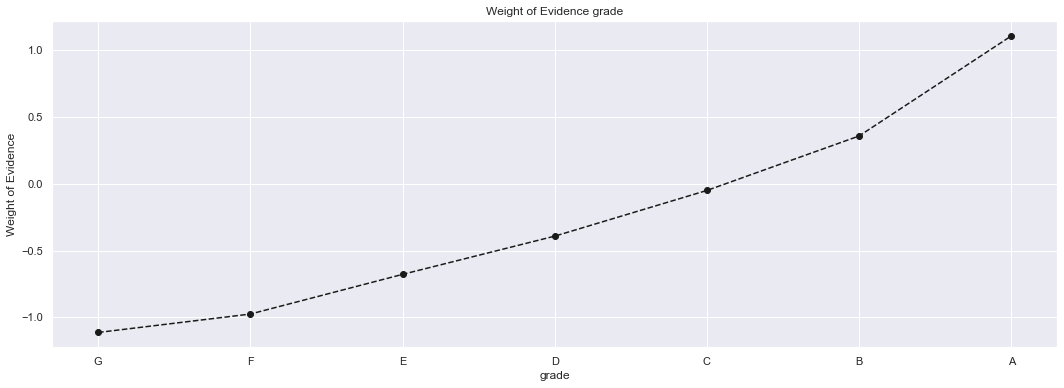

In [247]:
plot_by_woe(df_temp)

## Do rest discrete variables

'home_ownership'

In [248]:
df_temp = woe_discrete(df_inputs_pre, 'home_ownership', df_targets_pre)

In [249]:
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


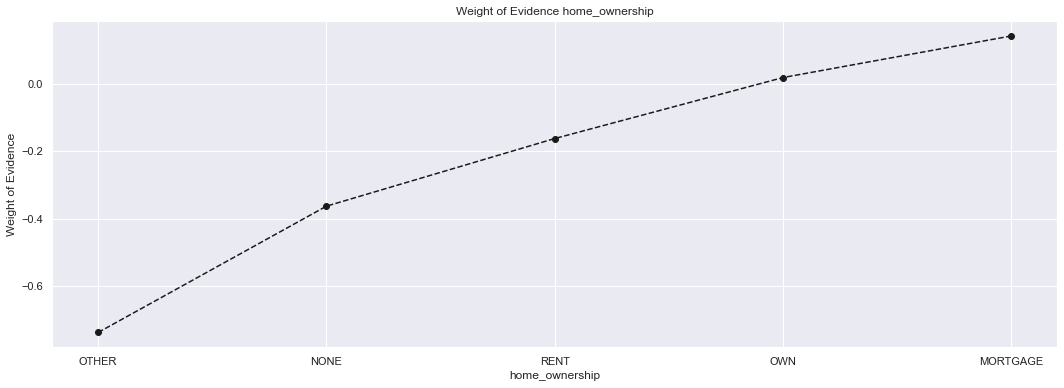

In [250]:
plot_by_woe(df_temp)

Due to high risk and low number of samples, we combine the 'ANY', 'OTHER' and 'NONE' categories to the riskest category with enough number of observations, i.e. 'RENT'

In [251]:
df_inputs_pre['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_pre['home_ownership:RENT'], df_inputs_pre['home_ownership:OTHER'], df_inputs_pre['home_ownership:NONE'], df_inputs_pre['home_ownership:ANY']])

'addr_state'

In [252]:
df_inputs_pre['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [253]:
df_temp = woe_discrete(df_inputs_pre, 'addr_state', df_targets_pre)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


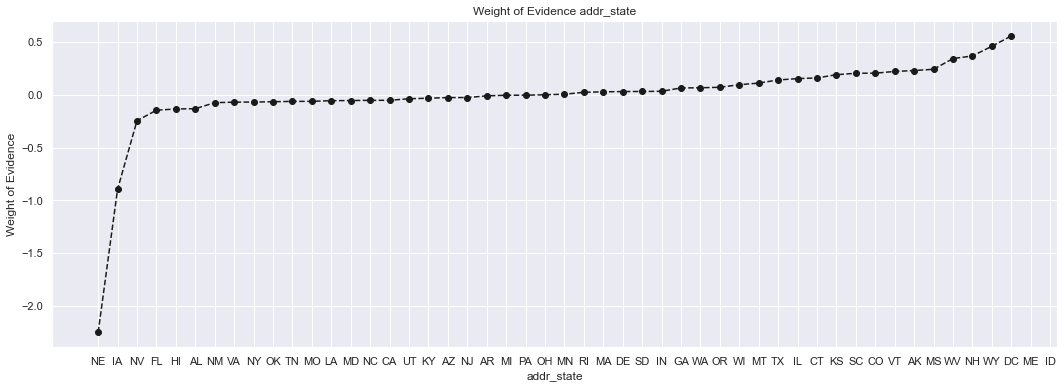

In [254]:
plot_by_woe(df_temp)

In [255]:
if ['addr_state:ND'] in df_inputs_pre.columns.values:
    pass
else:
    df_inputs_pre['addr_state:ND'] = 0

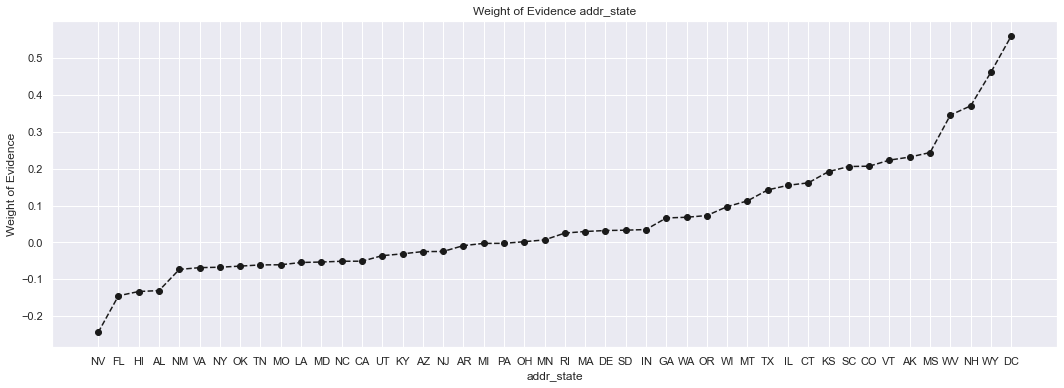

In [256]:
plot_by_woe(df_temp[2:-2])

In [257]:
# combine ND, NE, IA, NV, FL, HI, and AL
df_inputs_pre['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_pre['addr_state:ND'], df_inputs_pre['addr_state:NE'], df_inputs_pre['addr_state:IA'], df_inputs_pre['addr_state:NV'], df_inputs_pre['addr_state:FL'], df_inputs_pre['addr_state:HI'], df_inputs_pre['addr_state:AL']])

In [258]:
# combine WV, NH, WY, DC, ME, ID
df_inputs_pre['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_pre['addr_state:WV'], df_inputs_pre['addr_state:NH'], df_inputs_pre['addr_state:WY'], df_inputs_pre['addr_state:DC'], df_inputs_pre['addr_state:ME'], df_inputs_pre['addr_state:ID']])

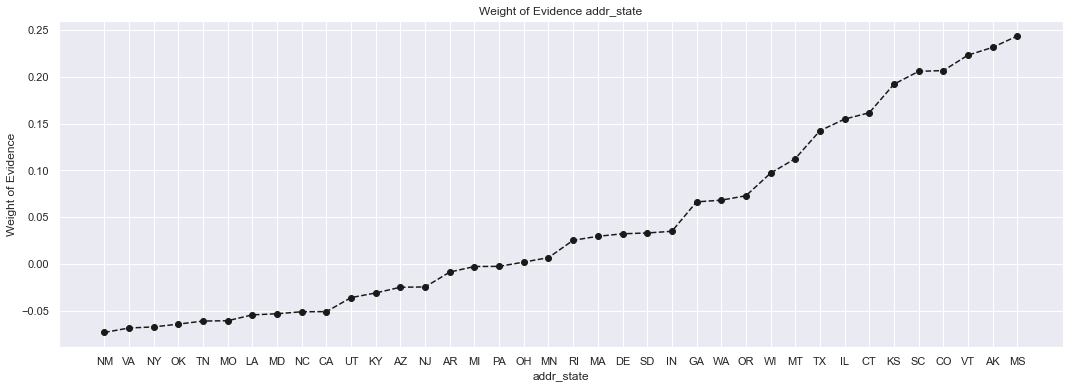

In [259]:
plot_by_woe(df_temp[6:-6])

In [260]:
# combine NM, VA, keep NY
df_inputs_pre['addr_state:NM_VA'] = sum([df_inputs_pre['addr_state:NM'], df_inputs_pre['addr_state:VA']])

In [261]:
# combine OK, TN, MO, LA, MD, NC, keep CA
df_inputs_pre['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_pre['addr_state:OK'], df_inputs_pre['addr_state:TN'], df_inputs_pre['addr_state:MO'], df_inputs_pre['addr_state:LA'], df_inputs_pre['addr_state:MD'], df_inputs_pre['addr_state:NC']])

In [262]:
# combine UT, KY, AZ, NJ
df_inputs_pre['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_pre['addr_state:UT'], df_inputs_pre['addr_state:KY'], df_inputs_pre['addr_state:AZ'], df_inputs_pre['addr_state:NJ']])

In [263]:
# combine AR, MI, PA, OH, MN
df_inputs_pre['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_pre['addr_state:AR'], df_inputs_pre['addr_state:MI'], df_inputs_pre['addr_state:PA'], df_inputs_pre['addr_state:OH'], df_inputs_pre['addr_state:MN']])

In [264]:
# combine RI, MA, DE, SD, IN
df_inputs_pre['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_pre['addr_state:RI'], df_inputs_pre['addr_state:MA'], df_inputs_pre['addr_state:DE'], df_inputs_pre['addr_state:SD'], df_inputs_pre['addr_state:IN']])

In [265]:
# combine GA, WA, OR
df_inputs_pre['addr_state:GA_WA_OR'] = sum([df_inputs_pre['addr_state:GA'], df_inputs_pre['addr_state:WA'], df_inputs_pre['addr_state:OR']])

In [266]:
# combine WI, MT, keep TX
df_inputs_pre['addr_state:WI_MT'] = sum([df_inputs_pre['addr_state:WI'], df_inputs_pre['addr_state:MT']])

In [267]:
# combine IL, CT
df_inputs_pre['addr_state:IL_CT'] = sum([df_inputs_pre['addr_state:IL'], df_inputs_pre['addr_state:CT']])

In [268]:
# combine KS, SC, CO, VT, AK, MS
df_inputs_pre['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_pre['addr_state:KS'], df_inputs_pre['addr_state:CO'], df_inputs_pre['addr_state:SC'], df_inputs_pre['addr_state:VT'], df_inputs_pre['addr_state:AK'], df_inputs_pre['addr_state:MS']])

'verification_status'

In [269]:
df_temp = woe_discrete(df_inputs_pre, 'verification_status', df_targets_pre)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


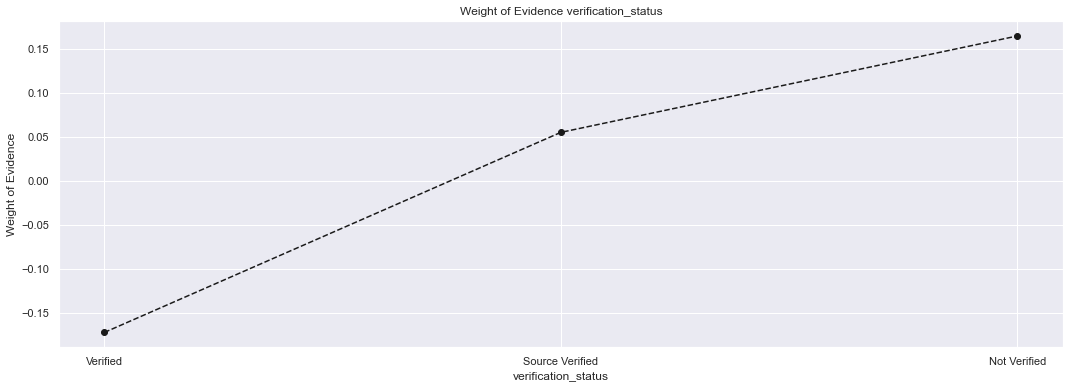

In [270]:
plot_by_woe(df_temp)

In [275]:
# 'verification_status:Not Verified', 'verification_status:Source Verified', verification_status:Verified

'purpose'

In [271]:
df_temp = woe_discrete(df_inputs_pre, 'purpose', df_targets_pre)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


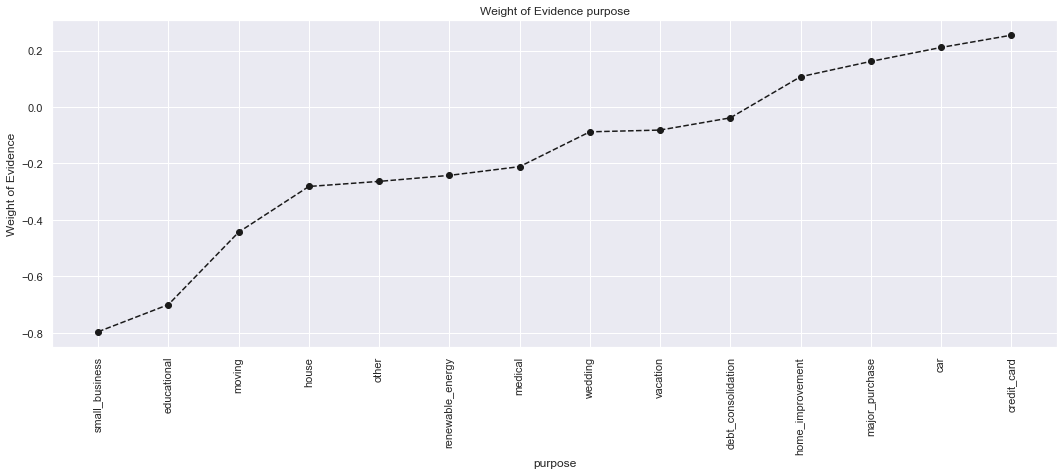

In [272]:
plot_by_woe(df_temp, 90)

In [274]:
# 'purpose:smabus_edu_mov_hou_oth', 'purpose:reen_med_wed_vac', 'purpose:debt_consolidation', 'purpose:hom_maj_car', 'purpose:credit_card'
#df_inputs_pre['purpose:']
df_inputs_pre['purpose:smabus_edu_mov_hou_oth'] = sum([df_inputs_pre['purpose:small_business'], df_inputs_pre['purpose:educational'], df_inputs_pre['purpose:moving'], df_inputs_pre['purpose:house'], df_inputs_pre['purpose:other']])

df_inputs_pre['purpose:reen_med_wed_vac'] = sum([df_inputs_pre['purpose:renewable_energy'], df_inputs_pre['purpose:medical'], df_inputs_pre['purpose:wedding'], df_inputs_pre['purpose:vacation']])

df_inputs_pre['purpose:hom_maj_car'] = sum([df_inputs_pre['purpose:home_improvement'], df_inputs_pre['purpose:major_purchase'], df_inputs_pre['purpose:car']])

'initial_list_status'

In [276]:
df_temp = woe_discrete(df_inputs_pre, 'initial_list_status', df_targets_pre)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


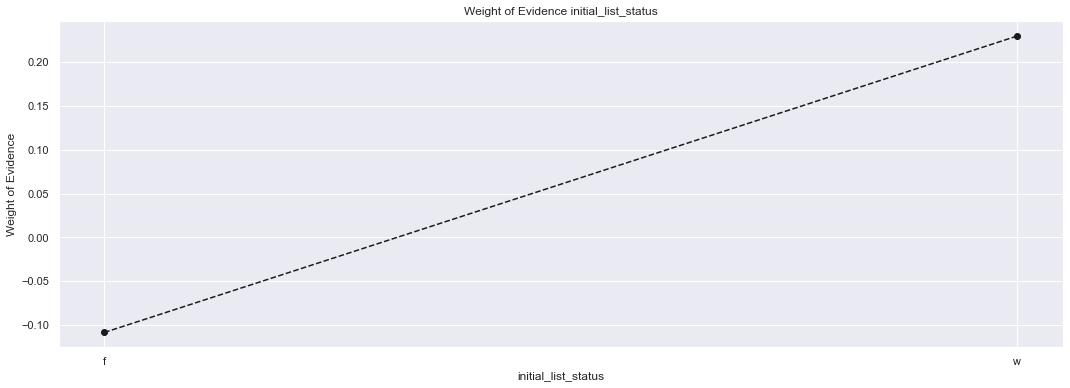

In [277]:
plot_by_woe(df_temp)

In [278]:
#'initial_list_status:f', 'initial_list_status:w'

### Continuous varialbes processing

In [279]:
def woe_ordered_continuous(df, continuous_variable_name, good_bad_variable_df):
    df = pd.concat([df[continuous_variable_name], good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    # df = df.sort_values(['WoE'])
    # df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

'term_int' variable

In [280]:
df_inputs_pre['term_int'].unique()

array([36, 60], dtype=int64)

In [281]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'term_int', df_targets_pre)

In [282]:
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


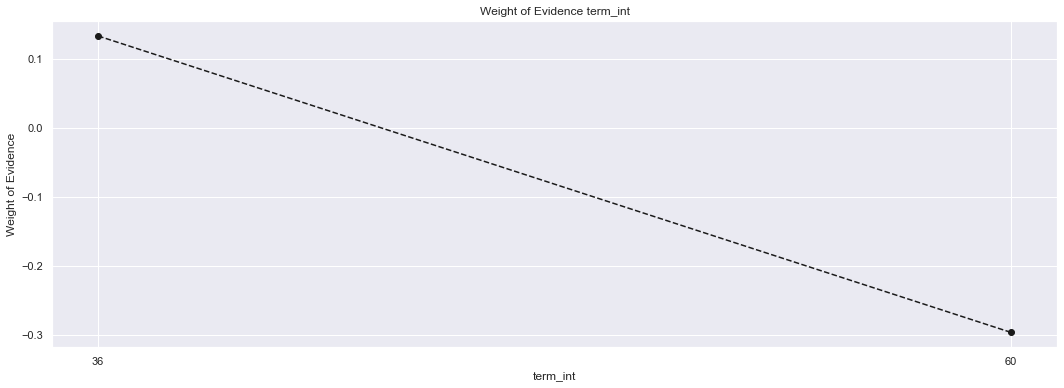

In [283]:
plot_by_woe(df_temp)

In [284]:
# 'term:36', 'term:60'
df_inputs_pre['term:36'] = np.where(df_inputs_pre['term_int'] == 36, 1, 0)
df_inputs_pre['term:60'] = np.where(df_inputs_pre['term_int'] == 60, 1, 0)

'emp_length_int'

In [285]:
df_inputs_pre['emp_length_int'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [286]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'emp_length_int', df_targets_pre)

In [287]:
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


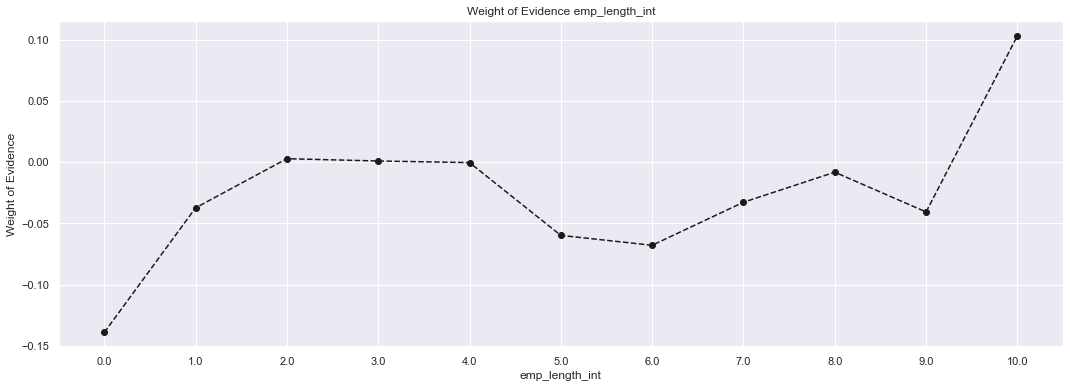

In [288]:
plot_by_woe(df_temp)

In [289]:
# add 'emp_length:0', add 'emp_length:1', add 'emp_length:2-4', add 'emp_length:5-6', add 'emp_length:7-9', add 'emp_length:10'
df_inputs_pre['emp_length:0'] = np.where(df_inputs_pre['emp_length_int'].isin([0]),1,0)
df_inputs_pre['emp_length:1'] = np.where(df_inputs_pre['emp_length_int'].isin([1]),1,0)
df_inputs_pre['emp_length:2-4'] = np.where(df_inputs_pre['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_pre['emp_length:5-6'] = np.where(df_inputs_pre['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_pre['emp_length:7-9'] = np.where(df_inputs_pre['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_pre['emp_length:10'] = np.where(df_inputs_pre['emp_length_int'].isin([10]),1,0)

'mths_since_issue_d'

In [290]:
df_inputs_pre['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [291]:
df_inputs_pre['mths_since_issue_d_factor'] = pd.cut(df_inputs_pre['mths_since_issue_d'],50)
df_inputs_pre['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [292]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'mths_since_issue_d_factor', df_targets_pre)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113186


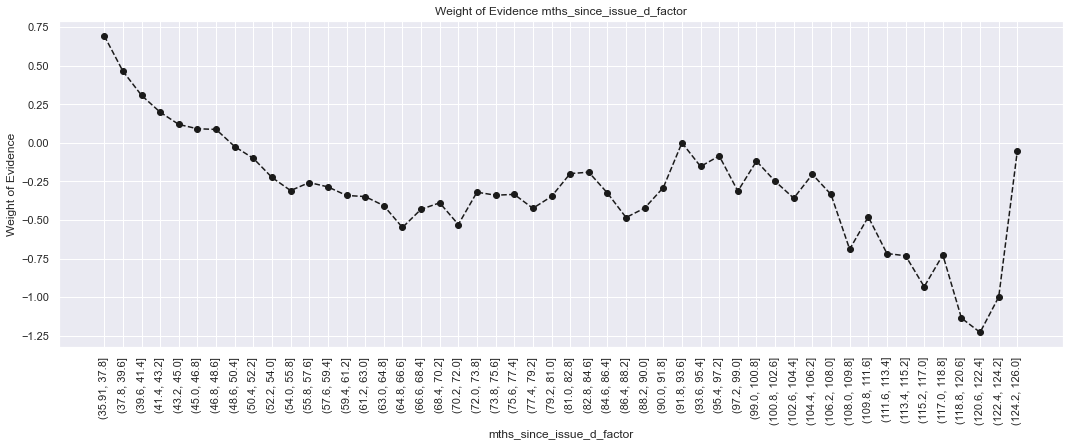

In [293]:
plot_by_woe(df_temp, 90)

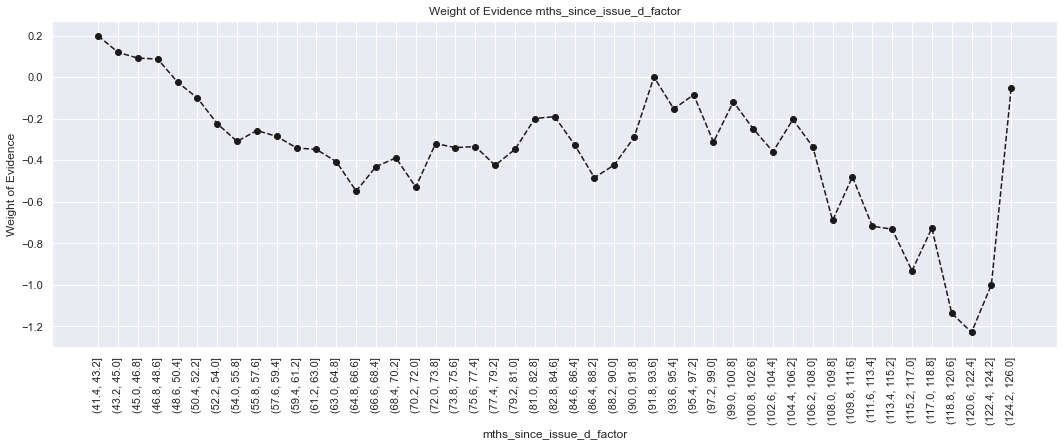

In [294]:
plot_by_woe(df_temp.iloc[3:,:], 90)

In [295]:
# 'mths_since_issue_d::<38', 'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41', 'mths_since_issue_d:42-48', mths_since_issue_d:49-52', 'mths_since_issue_d:53-64', 'mths_since_issue_d:65-84', 'mths_since_issue_d:>84'
df_inputs_pre['mths_since_issue_d::<38'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(38)),1,0)
df_inputs_pre['mths_since_issue_d:38-39'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(38,40)),1,0)  
df_inputs_pre['mths_since_issue_d:40-41'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(40,42)),1,0)  
df_inputs_pre['mths_since_issue_d:42-48'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(42,49)),1,0)
df_inputs_pre['mths_since_issue_d:49-52'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(49,53)),1,0)  
df_inputs_pre['mths_since_issue_d:53-64'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(53,65)),1,0)  
df_inputs_pre['mths_since_issue_d:65-84'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(65,85)),1,0)  
df_inputs_pre['mths_since_issue_d:>84'] = np.where(df_inputs_pre['mths_since_issue_d'].isin(range(85, int(df_inputs_pre['mths_since_issue_d'].max()))),1,0)  

'int_rate'

In [296]:
df_inputs_pre['int_rate_factor'] = pd.cut(df_inputs_pre['int_rate'],50)

In [297]:
df_inputs_pre['int_rate_factor']

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
                ...       
259178       (8.31, 8.722]
365838     (12.438, 12.85]
131932    (14.089, 14.502]
146867    (10.786, 11.199]
121958    (11.199, 11.612]
Name: int_rate_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [298]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'int_rate_factor', df_targets_pre)

In [299]:
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


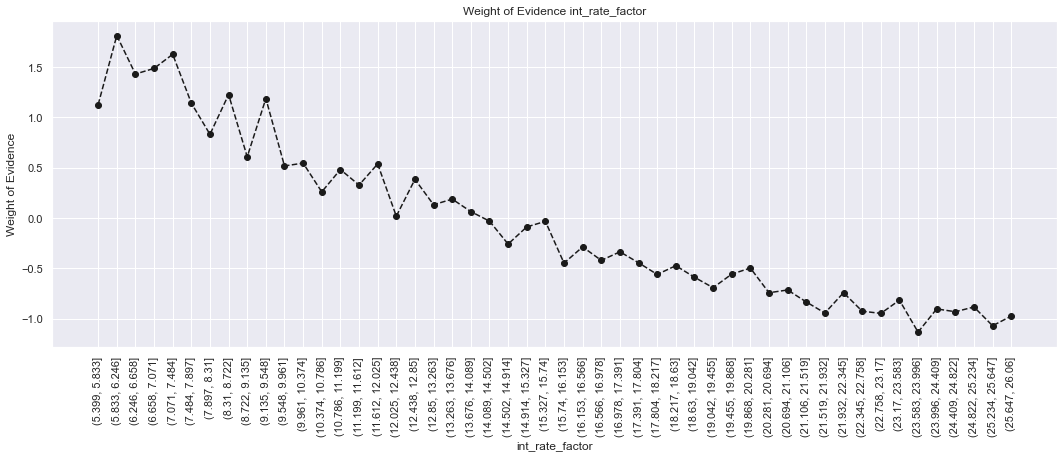

In [300]:
plot_by_woe(df_temp,90)

In [301]:
# 'int_rate:<9.548', 'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.75-20.281', 'int_rate:>20.281'
df_inputs_pre['int_rate:<9.548'] = np.where((df_inputs_pre['int_rate']< 9.548),1,0)
df_inputs_pre['int_rate:9.548-12.025'] = np.where((df_inputs_pre['int_rate'] >= 9.548 ) & (df_inputs_pre['int_rate'] < 12.025), 1, 0)
df_inputs_pre['int_rate:12.025-15.74'] = np.where((df_inputs_pre['int_rate'] >= 12.025) & (df_inputs_pre['int_rate'] < 15.74), 1, 0)
df_inputs_pre['int_rate:15.75-20.281'] = np.where((df_inputs_pre['int_rate'] >= 15.74) & (df_inputs_pre['int_rate'] < 20.281), 1, 0)
df_inputs_pre['int_rate:>20.281'] = np.where((df_inputs_pre['int_rate'] >= 20.281), 1, 0)

'funded_amnt'

In [302]:
df_inputs_pre['funded_amnt_factor'] = pd.cut(df_inputs_pre['funded_amnt'], 50)

In [303]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'funded_amnt_factor', df_targets_pre)

In [304]:
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


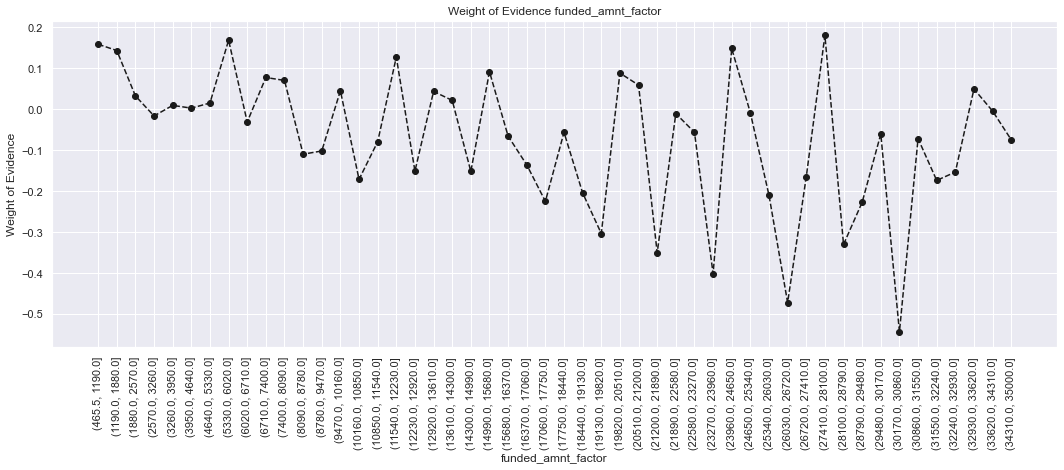

In [305]:
plot_by_woe(df_temp,90)

not to use 'funded_amnt'

'mths_since_earliest_cr_line'

In [310]:
df_inputs_pre['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_pre['mths_since_earliest_cr_line'],50)

In [311]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'mths_since_earliest_cr_line_factor', df_targets_pre)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,0.016273
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
6,"(70.44, 82.18]",722,0.898892,0.001936,649.0,73.0,0.001953,0.001790,0.087228,NaN,NaN,0.016273
7,"(82.18, 93.92]",1929,0.884914,0.005171,1707.0,222.0,0.005138,0.005444,-0.057930,0.013978,0.145158,0.016273
8,"(93.92, 105.66]",2817,0.857295,0.007552,2415.0,402.0,0.007269,0.009858,-0.304742,0.027619,0.246813,0.016273
9,"(105.66, 117.4]",5092,0.871170,0.013650,4436.0,656.0,0.013351,0.016087,-0.186397,0.013875,0.118345,0.016273


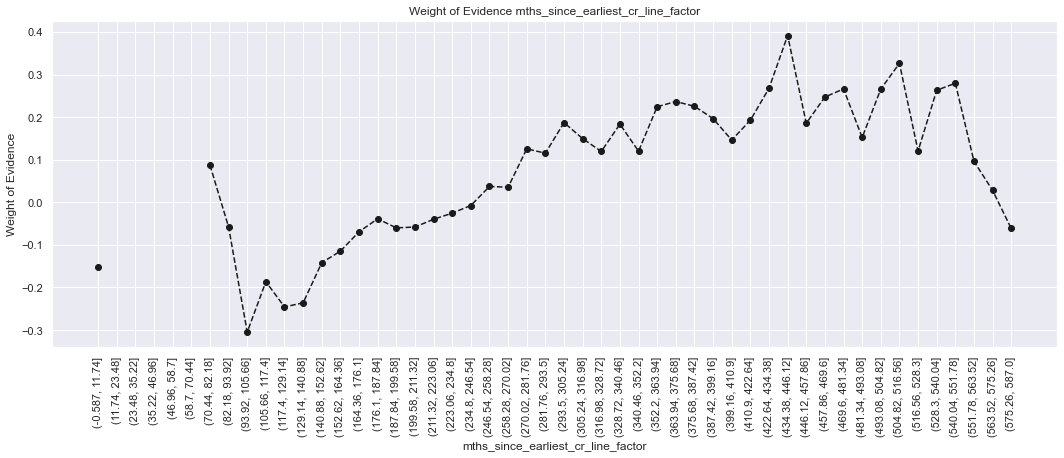

In [313]:
plot_by_woe(df_temp,90)

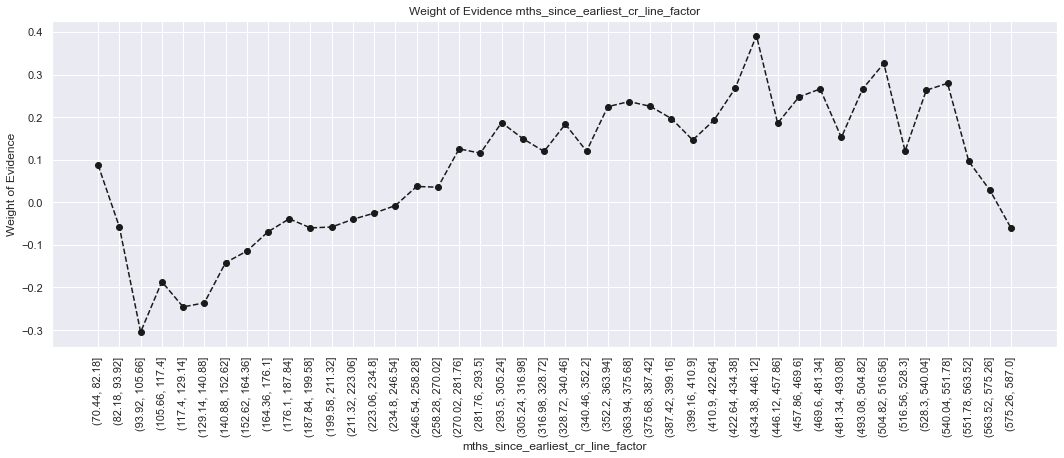

In [315]:
plot_by_woe(df_temp.iloc[6:,:],90)

In [316]:
# 'mths_since_earliest_cr_line:<140', 'mths_since_earliest_cr_line:141-164', 'mths_since_earliest_cr_line:165-247', 'mths_since_earliest_cr_line:248-270', 'mths_since_earliest_cr_line:271-352', 'mths_since_earliest_cr_line:>352'

df_inputs_pre['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_pre['mths_since_earliest_cr_line'].isin(range(140)),1,0)

df_inputs_pre['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_pre['mths_since_earliest_cr_line'].isin(range(141,165)),1,0)

df_inputs_pre['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_pre['mths_since_earliest_cr_line'].isin(range(165,248)),1,0)

df_inputs_pre['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_pre['mths_since_earliest_cr_line'].isin(range(248,271)),1,0)

df_inputs_pre['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_pre['mths_since_earliest_cr_line'].isin(range(271,353)),1,0)

df_inputs_pre['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_pre['mths_since_earliest_cr_line'].isin(range(353)),1,0)

'delinq_2yrs'

In [318]:
df_inputs_pre['delinq_2yrs'].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [319]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'delinq_2yrs', df_targets_pre)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


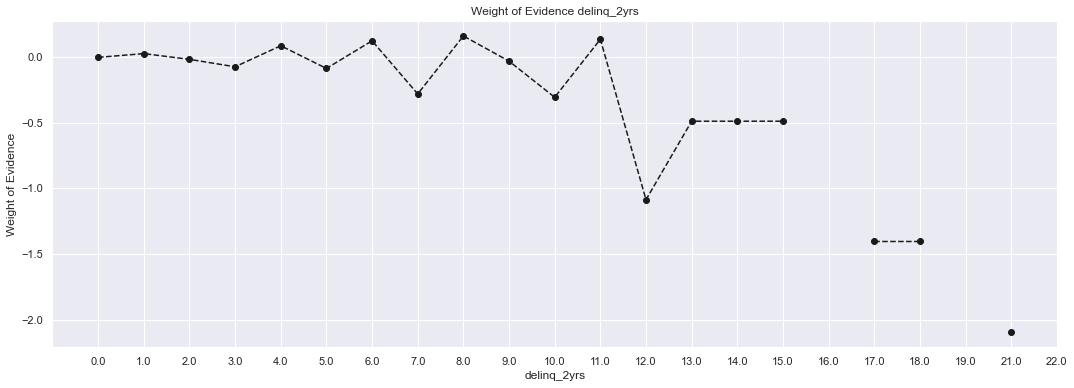

In [320]:
plot_by_woe(df_temp)

In [323]:
# 'delinq_2yrs:0', 'delinq_2yrs:1-3', 'delinq_2yrs:>=4'
df_inputs_pre['delinq_2yrs:0'] = np.where((df_inputs_pre['delinq_2yrs'] == 0), 1, 0)

df_inputs_pre['delinq_2yrs:1-3'] = np.where((df_inputs_pre['delinq_2yrs'] >=1) & (df_inputs_pre['delinq_2yrs'] <=3), 1, 0)

df_inputs_pre['delinq_2yrs:>=4'] = np.where((df_inputs_pre['delinq_2yrs'] >=4), 1, 0)

'inq_last_6mths'

In [325]:
df_inputs_pre['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [326]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'inq_last_6mths', df_targets_pre)
df_temp

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


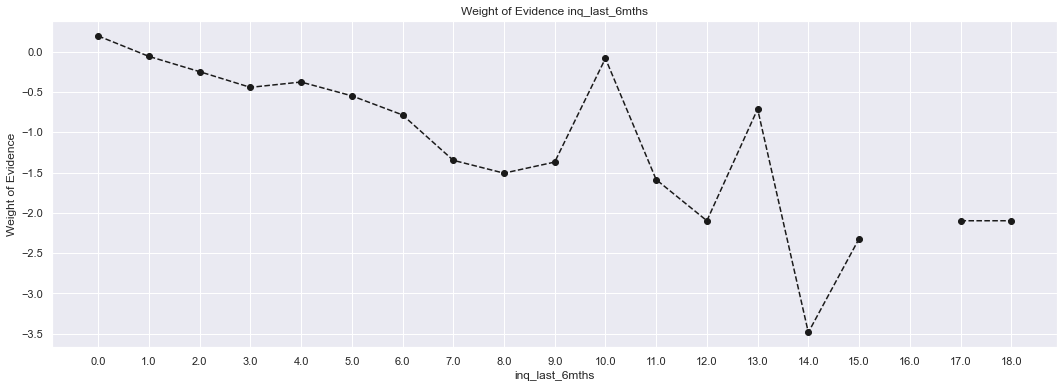

In [327]:
plot_by_woe(df_temp)

In [328]:
# 'inq_last_6mths:0', 'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6'

df_inputs_pre['inq_last_6mths:0'] = np.where((df_inputs_pre['inq_last_6mths'] == 0),  1, 0)
df_inputs_pre['inq_last_6mths:1-2'] = np.where((df_inputs_pre['inq_last_6mths'] >=1) & (df_inputs_pre['inq_last_6mths']<=2),  1, 0)
df_inputs_pre['inq_last_6mths:3-6'] = np.where((df_inputs_pre['inq_last_6mths']>=3) & (df_inputs_pre['inq_last_6mths']<=6),  1, 0)
df_inputs_pre['inq_last_6mths:>6'] = np.where((df_inputs_pre['inq_last_6mths']>6),  1, 0)

'open_acc'

In [329]:
df_inputs_pre['open_acc'].unique()

array([20., 15.,  9., 14.,  5., 13., 11.,  6., 10.,  7., 16.,  4.,  8.,
       12., 17.,  3., 18., 26., 24.,  2., 19., 25., 27., 30., 23., 22.,
       21.,  1., 29., 33., 28., 34.,  0., 41., 38., 32., 37., 31., 42.,
       40., 45., 46., 35., 36., 39., 44., 43., 49., 50., 53., 47., 48.,
       55., 51., 54., 62., 76., 84., 58., 52., 75.])

In [330]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'open_acc', df_targets_pre)
df_temp

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.045711,0.005879,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.064986,0.017419,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.080239,0.008868,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.089730,0.003592,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.095787,-0.015204,0.001838,0.018796,inf


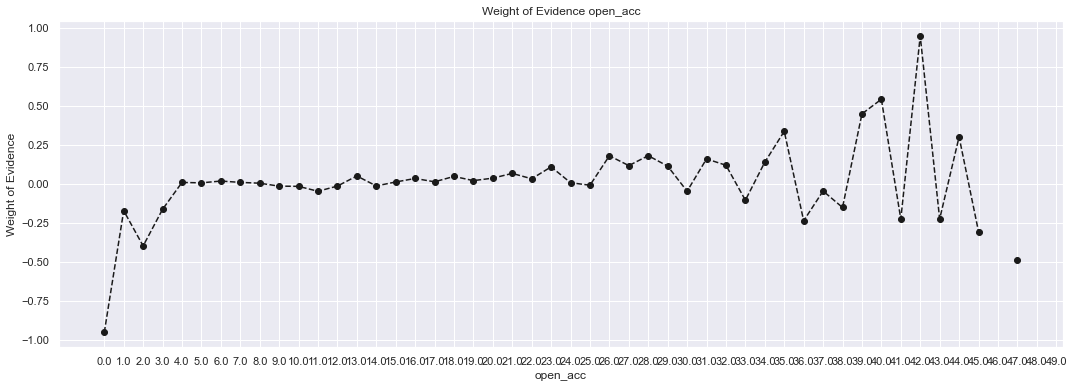

In [331]:
plot_by_woe(df_temp)

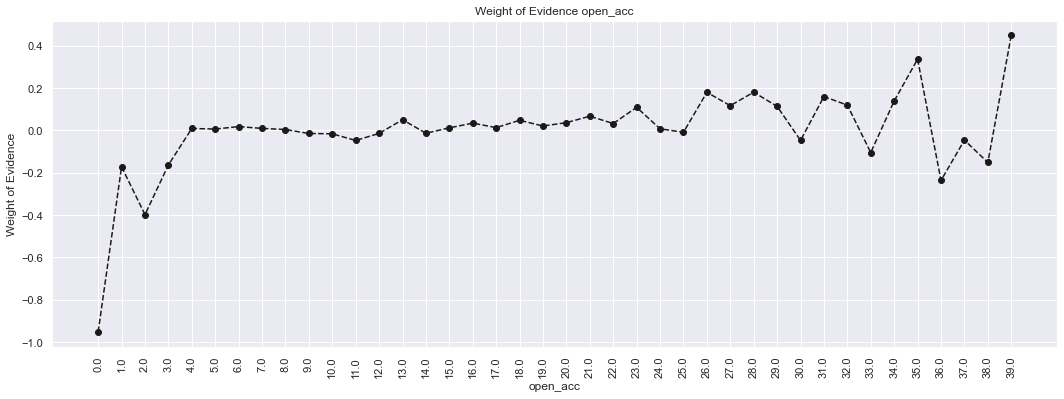

In [332]:
plot_by_woe(df_temp.iloc[:40,:],90)

In [334]:
# 'open_acc:0', 'open_acc:1-3', 'open_acc:4-12', 'open_acc:13-22', 'open_acc:23-25', 'open_acc:26-30' 'open_acc:>30'

df_inputs_pre['open_acc:0'] = np.where((df_inputs_pre['open_acc'] ==0), 1, 0)

df_inputs_pre['open_acc:1-3'] = np.where((df_inputs_pre['open_acc'] >= 1) & (df_inputs_pre['open_acc'] <= 3), 1, 0)

df_inputs_pre['open_acc:4-12'] = np.where((df_inputs_pre['open_acc'] >= 4) & (df_inputs_pre['open_acc'] <= 12), 1, 0)

df_inputs_pre['open_acc:13-22'] = np.where((df_inputs_pre['open_acc'] >= 13) & (df_inputs_pre['open_acc'] <= 22), 1, 0)

df_inputs_pre['open_acc:23-25'] = np.where((df_inputs_pre['open_acc'] >= 23) & (df_inputs_pre['open_acc'] <= 25), 1, 0)

df_inputs_pre['open_acc:26-30'] = np.where((df_inputs_pre['open_acc'] >= 26) & (df_inputs_pre['open_acc'] <= 30), 1, 0)

df_inputs_pre['open_acc:>30'] = np.where((df_inputs_pre['open_acc'] >= 31), 1, 0)

'pub_rec'

In [335]:
df_inputs_pre['pub_rec'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  9., 10., 13.,  8., 19.,
       11., 17., 34., 16., 12., 40., 18., 54., 15., 63., 21.])

In [336]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'pub_rec', df_targets_pre)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


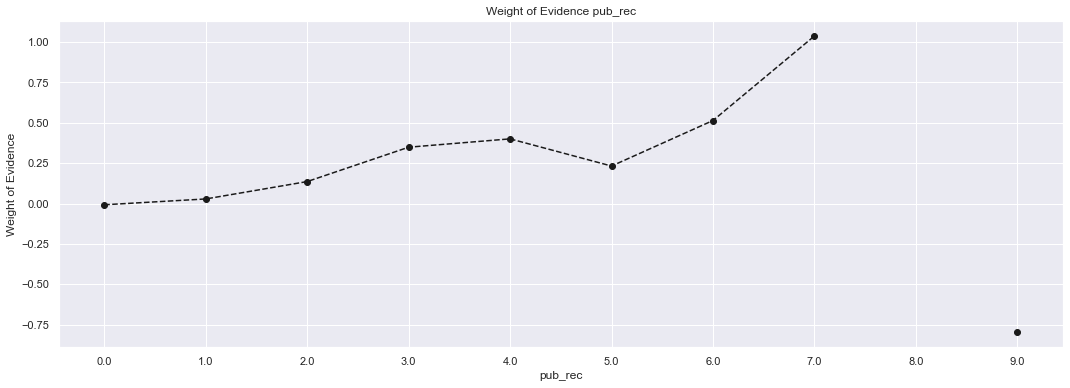

In [337]:
plot_by_woe(df_temp)

In [338]:
# 'pub_rec:0',  'pub_rec:1-2',  'pub_rec:3-6', 'pub_rec:>6'

df_inputs_pre['pub_rec:0'] = np.where((df_inputs_pre['pub_rec'] == 0), 1, 0)

df_inputs_pre['pub_rec:1-2'] = np.where((df_inputs_pre['pub_rec'] >= 1) & (df_inputs_pre['pub_rec'] <= 2), 1, 0)

df_inputs_pre['pub_rec:3-6'] = np.where((df_inputs_pre['pub_rec'] >= 3) & (df_inputs_pre['pub_rec'] <= 6), 1, 0)

df_inputs_pre['pub_rec:>6'] = np.where((df_inputs_pre['pub_rec'] > 6), 1, 0)

'total_acc'

In [345]:
df_inputs_pre['total_acc'].describe()
df_inputs_pre['total_acc'].unique()

array([ 32.,  38.,  20.,  13.,  30.,  26.,   6.,  21.,  36.,  48.,  25.,
        33.,  27.,  23.,  44.,   9.,  10.,  18.,  31.,   5.,  19.,  15.,
        39.,  12.,  57.,  24.,  22.,  17.,  16.,  42.,   7.,  29.,  28.,
        34.,  43.,  63.,  14.,  11.,  40.,  37.,  41.,  45.,  35.,  49.,
        54.,  52.,  53.,  60.,  56.,   4.,   8.,  47.,  51.,  46.,  61.,
        59.,  50.,  58.,   0.,  64.,   3.,  55.,  62.,   2.,   1.,  71.,
       105.,  66.,  68.,  69.,  67.,  80.,  70.,  65.,  75.,  85.,  93.,
        83.,  73.,  78.,  81.,  74.,  84.,  77.,  89.,  87.,  72.,  76.,
       117.,  90.,  95.,  79.,  91., 121., 119., 100., 118.,  86., 102.,
        82.,  96.,  92., 116.,  94.,  98.,  88., 150., 106., 124.,  97.,
       101.,  99.])

In [341]:
df_inputs_pre['total_acc_factor'] = pd.cut(df_inputs_pre['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_pre, 'total_acc_factor', df_targets_pre)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,NaN,NaN,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,0.054299,0.402388,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,0.008374,0.073555,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,0.008152,0.075703,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,0.000001,0.000011,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,0.005986,0.058505,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,0.001112,0.011073,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,0.005337,0.054022,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,0.003950,0.041499,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,0.003661,0.039725,inf


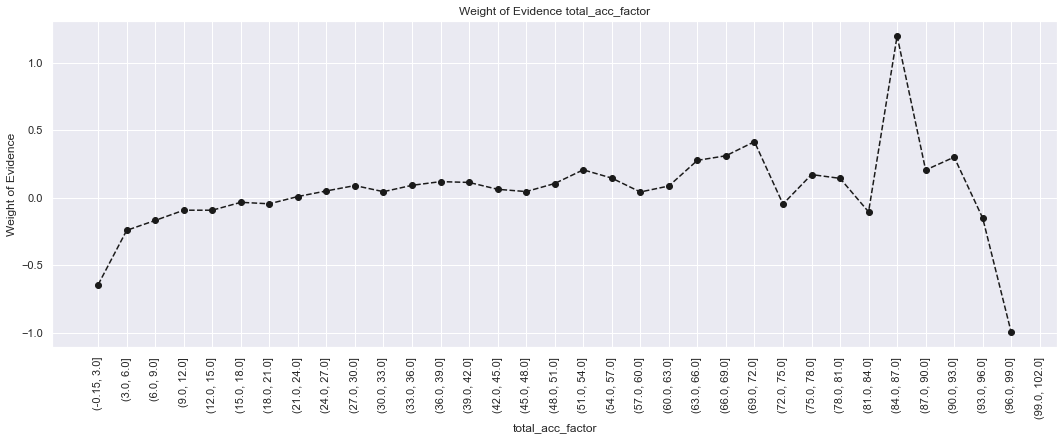

In [342]:
plot_by_woe(df_temp,90)

In [346]:
# 'total_acc:<=9', 'total_acc:10-21', 'total_acc:22-33', 'total_acc:34-51', 'total_acc:>51'

df_inputs_pre['total_acc:<=9'] = np.where((df_inputs_pre['total_acc'] <= 9), 1, 0)

df_inputs_pre['total_acc:10-21'] = np.where((df_inputs_pre['total_acc'] >= 10) & (df_inputs_pre['total_acc'] <= 21), 1, 0)

df_inputs_pre['total_acc:22-33'] = np.where((df_inputs_pre['total_acc'] >= 22) & (df_inputs_pre['total_acc'] <= 33), 1, 0)

df_inputs_pre['total_acc:34-51'] = np.where((df_inputs_pre['total_acc'] >= 34) & (df_inputs_pre['total_acc'] <= 51), 1, 0)

df_inputs_pre['total_acc:>51'] = np.where((df_inputs_pre['total_acc'] > 51), 1, 0)

'acc_now_delinq'

In [348]:
df_inputs_pre['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [349]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'acc_now_delinq', df_targets_pre)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


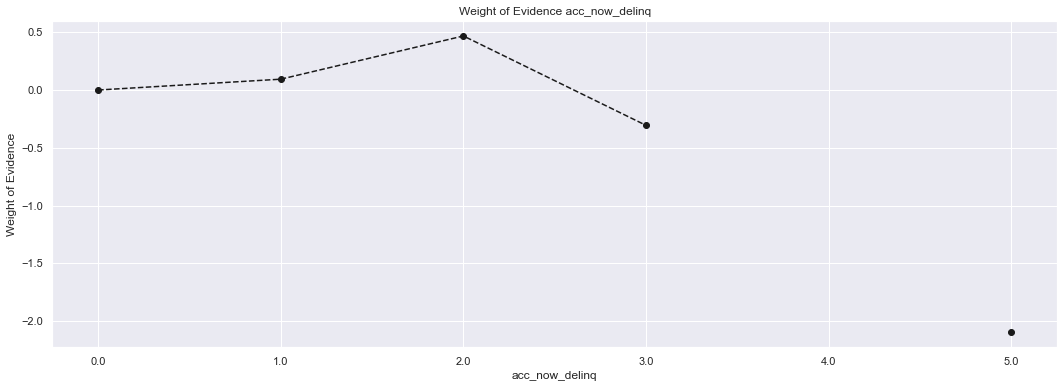

In [350]:
plot_by_woe(df_temp)

In [351]:
# 'acc_now_delinq:0','acc_now_delinq:>=1'

df_inputs_pre['acc_now_delinq:0'] = np.where((df_inputs_pre['acc_now_delinq'] == 0), 1, 0)

df_inputs_pre['acc_now_delinq:>=1'] = np.where((df_inputs_pre['acc_now_delinq'] >= 1), 1, 0)

'total_rev_hi_lim'

In [353]:
df_inputs_pre['total_rev_hi_lim'].nunique()

12661

In [356]:
df_inputs_pre['total_rev_hi_lim'].describe()

count    3.730280e+05
mean     2.757071e+04
std      3.637628e+04
min      0.000000e+00
25%      1.160000e+04
50%      2.010000e+04
75%      3.460000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [358]:
df_inputs_pre_temp = df_inputs_pre[df_inputs_pre['total_rev_hi_lim'] < 200000]

In [361]:
df_inputs_pre_temp['total_rev_hi_lim_factor'] = pd.cut(df_inputs_pre_temp['total_rev_hi_lim'], 50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [365]:
df_temp = woe_ordered_continuous(df_inputs_pre_temp, 'total_rev_hi_lim_factor', df_targets_pre[df_inputs_pre_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-199.9, 3998.0]",12013,0.862399,0.032300,10360.0,1653.0,0.031281,0.040588,-0.260462,NaN,NaN,0.04392
1,"(3998.0, 7996.0]",37732,0.874298,0.101453,32989.0,4743.0,0.099608,0.116461,-0.156318,0.011899,0.104144,0.04392
2,"(7996.0, 11994.0]",46663,0.878062,0.125467,40973.0,5690.0,0.123715,0.139714,-0.121619,0.003764,0.034699,0.04392
3,"(11994.0, 15992.0]",47401,0.879222,0.127451,41676.0,5725.0,0.125838,0.140574,-0.110740,0.001160,0.010880,0.04392
4,"(15992.0, 19990.0]",39288,0.879709,0.105637,34562.0,4726.0,0.104357,0.116044,-0.106147,0.000487,0.004593,0.04392
5,"(19990.0, 23988.0]",33983,0.885472,0.091373,30091.0,3892.0,0.090857,0.095565,-0.050520,0.005763,0.055627,0.04392
6,"(23988.0, 27986.0]",28292,0.886116,0.076071,25070.0,3222.0,0.075697,0.079114,-0.044153,0.000644,0.006367,0.04392
7,"(27986.0, 31984.0]",22175,0.894566,0.059624,19837.0,2338.0,0.059896,0.057408,0.042431,0.008450,0.086583,0.04392
8,"(31984.0, 35982.0]",18948,0.892284,0.050947,16907.0,2041.0,0.051049,0.050115,0.018465,0.002282,0.023965,0.04392
9,"(35982.0, 39980.0]",14556,0.911239,0.039138,13264.0,1292.0,0.040050,0.031724,0.233040,0.018955,0.214574,0.04392


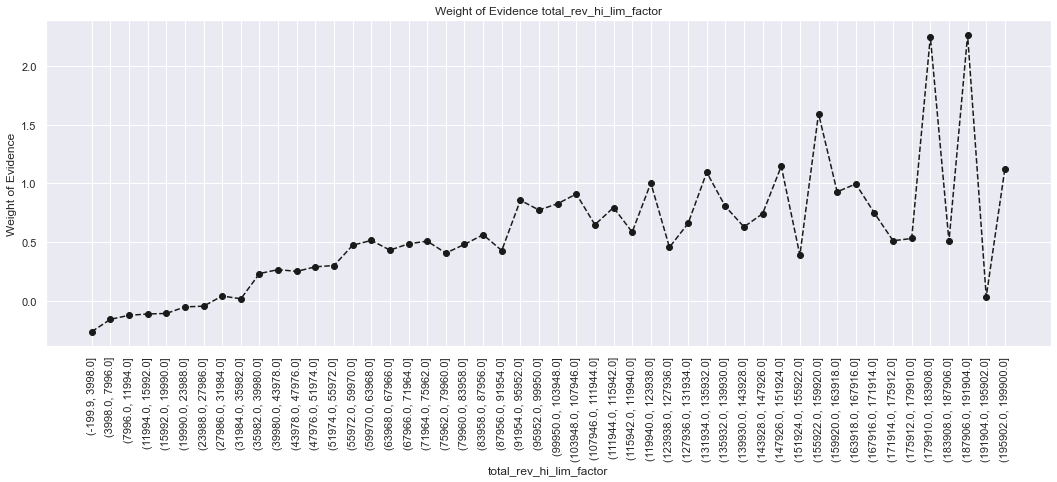

In [367]:
plot_by_woe(df_temp,90)

In [369]:
# 'total_rev_hi_lim:<36K', 'total_rev_hi_lim:36K-56K', 'total_rev_hi_lim:56K-92K', 'total_rev_hi_lim:>92K'

df_inputs_pre['total_rev_hi_lim:<36K'] = np.where((df_inputs_pre['total_rev_hi_lim'] < 36000), 1, 0)

df_inputs_pre['total_rev_hi_lim:36K-56K'] = np.where((df_inputs_pre['total_rev_hi_lim'] >= 36000) & (df_inputs_pre['total_rev_hi_lim'] < 56000), 1, 0)

df_inputs_pre['total_rev_hi_lim:56K-92K'] = np.where((df_inputs_pre['total_rev_hi_lim'] >= 56000) & (df_inputs_pre['total_rev_hi_lim'] < 92000), 1, 0)

df_inputs_pre['total_rev_hi_lim:>92K'] = np.where((df_inputs_pre['total_rev_hi_lim'] <= 92000), 1, 0)

'installment'

In [354]:
df_inputs_pre['installment'].nunique()

51429

In [370]:
df_inputs_pre['installment_factor'] = pd.cut(df_inputs_pre['installment'],50)

In [371]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'installment_factor', df_targets_pre)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,NaN,NaN,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.008639,0.097667,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.004517,0.048190,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.002677,0.027715,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.006166,0.064776,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.002306,0.024615,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.010590,0.117247,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.004400,0.050059,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.000993,0.011121,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.010296,0.110801,0.013497


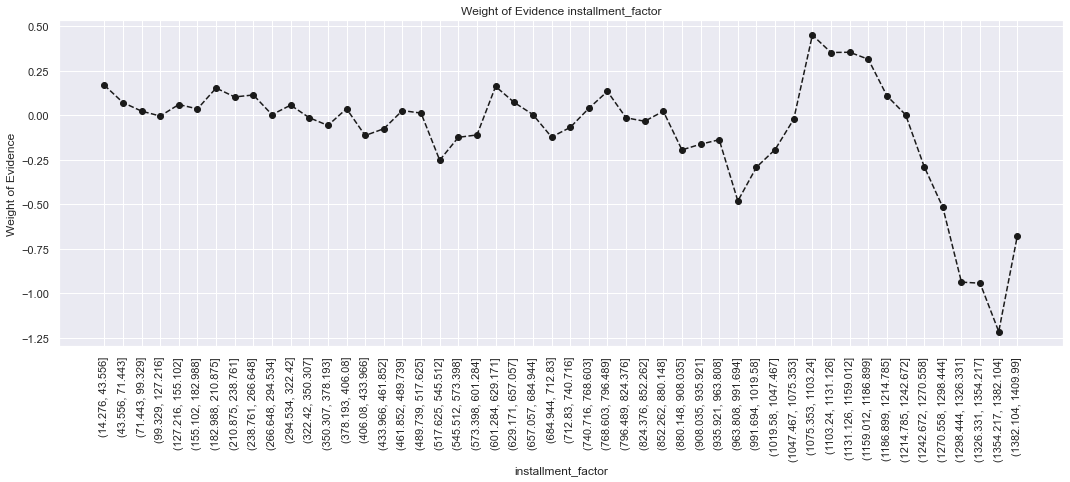

In [373]:
plot_by_woe(df_temp,90)

In [374]:
# do not use 'installment'

'annual_inc'

In [131]:
df_inputs_pre['annual_inc_factor'] = pd.cut(df_inputs_pre['annual_inc'],50)

In [132]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'annual_inc_factor', df_targets_pre)

In [134]:
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,NaN,NaN,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,0.036871,0.442440,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,0.005055,0.075651,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,0.009267,0.153002,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,0.055830,0.717100,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,0.008379,0.084362,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,0.082051,1.523053,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


In [ ]:
# one dummy for high income 'annual_inc:>140000'

In [139]:
df_inputs_pre_temp = df_inputs_pre[df_inputs_pre['annual_inc']<=140000]

In [141]:
df_inputs_pre_temp['annual_inc_factor'] = pd.cut(df_inputs_pre_temp['annual_inc'],50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
df_temp = woe_ordered_continuous(df_inputs_pre_temp, 'annual_inc_factor', df_targets_pre[df_inputs_pre['annual_inc']<=140000])

In [143]:
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689458,NaN,NaN,0.049818
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.977140,0.050000,0.287682,0.049818
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000920,-0.133818,0.124564,0.843322,0.049818
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.002402,-0.503155,0.046411,0.369337,0.049818
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.005238,-0.486019,0.002425,0.017135,0.049818
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.005928,-0.360092,0.016990,0.125927,0.049818
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.010809,-0.297080,0.007964,0.063012,0.049818
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.009914,-0.383737,0.011044,0.086657,0.049818
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.027137,-0.351843,0.004143,0.031894,0.049818
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.020570,-0.282338,0.008714,0.069505,0.049818


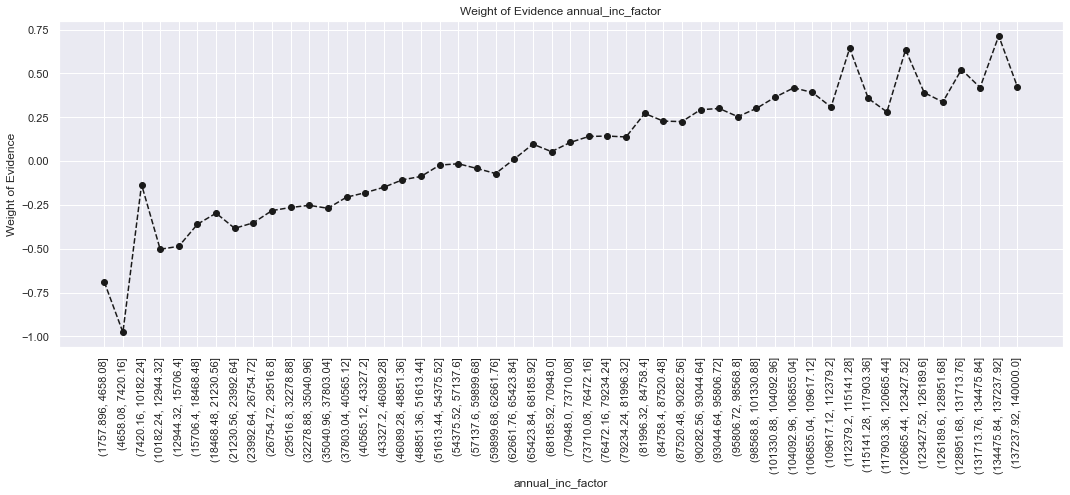

In [144]:
plot_by_woe(df_temp, 90)

In [145]:
# 'annual_inc:<20K', 'annual_inc:20K-30K', 'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100K-120K', 'annual_inc:120K-140K', 'annual_inc:>140K'
df_inputs_pre['annual_inc:<20K'] = np.where((df_inputs_pre['annual_inc'] < 20000), 1, 0) 
df_inputs_pre['annual_inc:20K-30K'] = np.where((df_inputs_pre['annual_inc'] < 20000) & (df_inputs_pre['annual_inc'] >= 30000), 1, 0) 
df_inputs_pre['annual_inc:30K-40K'] = np.where((df_inputs_pre['annual_inc'] < 30000) & (df_inputs_pre['annual_inc'] >= 40000), 1, 0) 
df_inputs_pre['annual_inc:40K-50K'] = np.where((df_inputs_pre['annual_inc'] < 40000) & (df_inputs_pre['annual_inc'] >= 50000), 1, 0) 
df_inputs_pre['annual_inc:50K-60K'] = np.where((df_inputs_pre['annual_inc'] < 50000) & (df_inputs_pre['annual_inc'] >= 60000), 1, 0) 
df_inputs_pre['annual_inc:60K-70K'] = np.where((df_inputs_pre['annual_inc'] < 60000) & (df_inputs_pre['annual_inc'] >= 70000), 1, 0) 
df_inputs_pre['annual_inc:70K-80K'] = np.where((df_inputs_pre['annual_inc'] < 70000) & (df_inputs_pre['annual_inc'] >= 80000), 1, 0) 
df_inputs_pre['annual_inc:80K-90K'] = np.where((df_inputs_pre['annual_inc'] < 80000) & (df_inputs_pre['annual_inc'] >= 90000), 1, 0) 
df_inputs_pre['annual_inc:90K-100K'] = np.where((df_inputs_pre['annual_inc'] < 90000) & (df_inputs_pre['annual_inc'] >= 100000), 1, 0) 
df_inputs_pre['annual_inc:100K-120K'] = np.where((df_inputs_pre['annual_inc'] < 100000) & (df_inputs_pre['annual_inc'] >= 120000), 1, 0) 
df_inputs_pre['annual_inc:120K-140K'] = np.where((df_inputs_pre['annual_inc'] < 120000) & (df_inputs_pre['annual_inc'] >= 140000), 1, 0) 
df_inputs_pre['annual_inc:>140K'] = np.where((df_inputs_pre['annual_inc'] >= 140000), 1, 0) 

'mths_since_last_delinq'

In [146]:
df_inputs_pre_temp = df_inputs_pre[pd.notnull(df_inputs_pre['mths_since_last_delinq'])]

In [147]:
df_inputs_pre_temp.shape

(172843, 246)

In [148]:
df_inputs_pre.shape

(373028, 246)

In [150]:
df_inputs_pre_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_pre_temp['mths_since_last_delinq'],50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
df_temp = woe_ordered_continuous(df_inputs_pre_temp, 'mths_since_last_delinq_factor', df_targets_pre[df_inputs_pre_temp.index])

In [153]:
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,NaN,NaN,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,0.016097,0.152164,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,0.005215,0.053372,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,0.003983,0.040967,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,0.006087,0.063147,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,0.002227,0.023470,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,0.003592,0.038062,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,0.001223,0.013085,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,0.007115,0.078141,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,0.004794,0.053184,inf


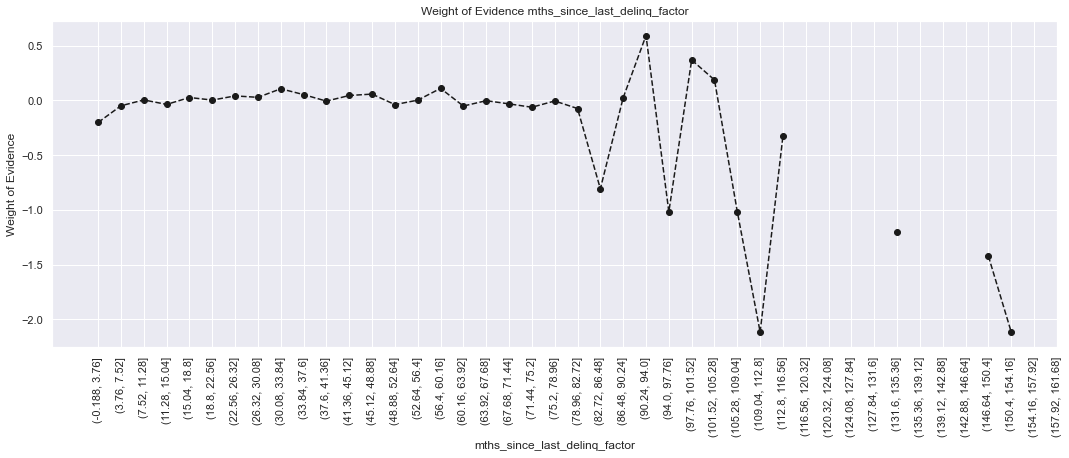

In [154]:
plot_by_woe(df_temp,90)

In [155]:
# 'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57'
df_inputs_pre['mths_since_last_delinq:Missing'] = np.where((df_inputs_pre['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_pre['mths_since_last_delinq:0-3'] = np.where((df_inputs_pre['mths_since_last_delinq'] >= 0) & (df_inputs_pre['mths_since_last_delinq'] < 3), 1, 0)
df_inputs_pre['mths_since_last_delinq:4-30'] = np.where((df_inputs_pre['mths_since_last_delinq'] >= 4) & (df_inputs_pre['mths_since_last_delinq'] < 30), 1, 0)
df_inputs_pre['mths_since_last_delinq:31-56'] = np.where((df_inputs_pre['mths_since_last_delinq'] >= 31) & (df_inputs_pre['mths_since_last_delinq'] < 56), 1, 0)
df_inputs_pre['mths_since_last_delinq:>=57'] = np.where((df_inputs_pre['mths_since_last_delinq'] >= 57), 1, 0)

'dti'

In [376]:
df_inputs_pre['dti'].nunique()

3997

In [377]:
df_inputs_pre['dti_factor'] = pd.cut(df_inputs_pre['dti'], 50)

In [378]:
df_temp = woe_ordered_continuous(df_inputs_pre, 'dti_factor', df_targets_pre)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",1553,0.898905,0.004163,1396.0,157.0,0.004202,0.003850,0.087376,NaN,NaN,0.026725
1,"(0.8, 1.6]",1965,0.896692,0.005268,1762.0,203.0,0.005303,0.004978,0.063254,0.002213,0.024122,0.026725
2,"(1.6, 2.399]",2509,0.910323,0.006726,2284.0,225.0,0.006874,0.005518,0.219838,0.013631,0.156584,0.026725
3,"(2.399, 3.199]",3234,0.910019,0.008670,2943.0,291.0,0.008858,0.007136,0.216117,0.000304,0.003722,0.026725
4,"(3.199, 3.999]",4124,0.907856,0.011055,3744.0,380.0,0.011269,0.009319,0.189994,0.002162,0.026123,0.026725
5,"(3.999, 4.799]",5037,0.917213,0.013503,4620.0,417.0,0.013905,0.010226,0.307319,0.009356,0.117325,0.026725
6,"(4.799, 5.599]",5989,0.911671,0.016055,5460.0,529.0,0.016433,0.012973,0.236471,0.005541,0.070848,0.026725
7,"(5.599, 6.398]",6781,0.914909,0.018178,6204.0,577.0,0.018673,0.014150,0.277362,0.003238,0.040892,0.026725
8,"(6.398, 7.198]",7665,0.913372,0.020548,7001.0,664.0,0.021071,0.016283,0.257781,0.001537,0.019581,0.026725
9,"(7.198, 7.998]",8747,0.915514,0.023449,8008.0,739.0,0.024102,0.018123,0.285153,0.002141,0.027372,0.026725


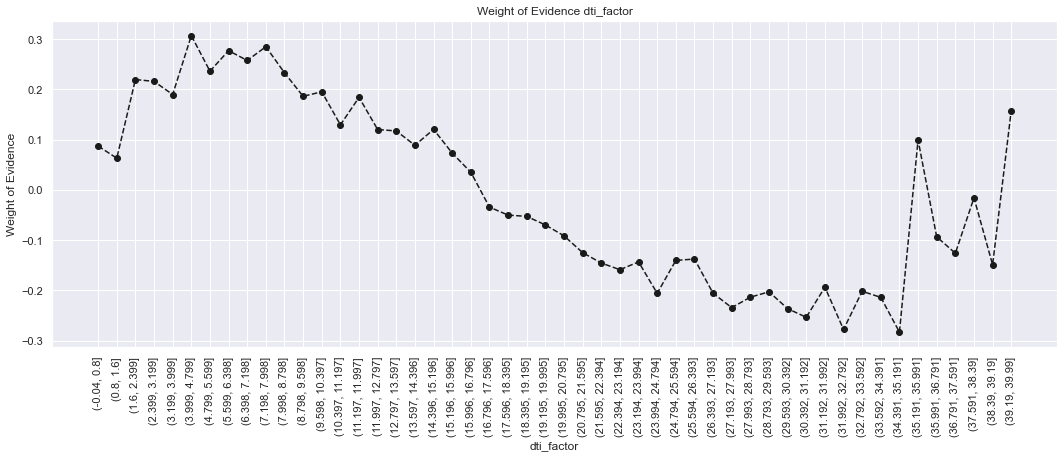

In [380]:
plot_by_woe(df_temp,90)

'mths_since_last_record'

### save precessed data to X_train

In [157]:
X_train = df_inputs_pre

## Preprocessing the Test Dataset

change from
df_inputs_pre = X_train
df_targets_pre = y_train

to
df_inputs_pre = Xtest
df_targets_pre = y_test

rerun the above section

In [158]:
X_test = df_inputs_pre

In [ ]:
X_train.to_csv('loan_data_inputs_train.csv')
y_train.to_csv('loan_data_targets_train.csv')
X_test.to_csv('loan_data_inputs_test.csv')
y_test.to_csv('loan_data_targets_test.csv')